In [1]:
#import data by kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle datasets download -d iamsouravbanerjee/indian-food-images-dataset

 96% 342M/355M [00:03<00:00, 95.3MB/s]
100% 355M/355M [00:03<00:00, 98.2MB/s]


In [3]:
#file unzip
import zipfile
zip_ref = zipfile.ZipFile('/content/indian-food-images-dataset.zip') 
zip_ref.extractall('/content')
zip_ref.close()

In [4]:
import os
import re
import cv2
import random

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn import preprocessing
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
data = pd.read_csv('/content/List of Indian Foods.txt')

In [6]:
data.head()

,adhirasam
0,aloo_gobi
1,aloo_matar
2,aloo_methi
3,aloo_shimla_mirch
4,aloo_tikki


In [7]:
data.shape

(79, 1)

In [8]:
label_encoder = preprocessing.LabelEncoder()
data['food_id'] = label_encoder.fit_transform(data['adhirasam'])

In [9]:
data.head()

,adhirasam,food_id
0,aloo_gobi,0
1,aloo_matar,1
2,aloo_methi,2
3,aloo_shimla_mirch,3
4,aloo_tikki,4


In [10]:
data['adhirasam'].unique()

array(['aloo_gobi', 'aloo_matar', 'aloo_methi', 'aloo_shimla_mirch',
       'aloo_tikki', 'anarsa', 'ariselu', 'bandar_laddu', 'basundi',
       'bhatura', 'bhindi_masala', 'biryani', 'boondi', 'butter_chicken',
       'chak_hao_kheer', 'cham_cham', 'chana_masala', 'chapati',
       'chhena_kheeri', 'chicken_razala', 'chicken_tikka',
       'chicken_tikka_masala', 'chikki', 'daal_baati_churma', 'daal_puri',
       'dal_makhani', 'dal_tadka', 'dharwad_pedha', 'doodhpak',
       'double_ka_meetha', 'dum_aloo', 'gajar_ka_halwa', 'gavvalu',
       'ghevar', 'gulab_jamun', 'imarti', 'jalebi', 'kachori',
       'kadai_paneer', 'kadhi_pakoda', 'kajjikaya', 'kakinada_khaja',
       'kalakand', 'karela_bharta', 'kofta', 'kuzhi_paniyaram', 'lassi',
       'ledikeni', 'litti_chokha', 'lyangcha', 'maach_jhol',
       'makki_di_roti_sarson_da_saag', 'malapua', 'misi_roti',
       'misti_doi', 'modak', 'mysore_pak', 'naan', 'navrattan_korma',
       'palak_paneer', 'paneer_butter_masala', 'phirni', 

In [11]:
# Total Unique Label

print('Total Unique Label: ', len(data['adhirasam'].unique()))

Total Unique Label:  79


In [12]:
labelname = []
images = []
images_path = []
images_pixels = []
labels = []

i = 0

path = '/content/Indian Food Images/Indian Food Images'

for directory in os.listdir(path):
    labelname.append(directory)
    for img in os.listdir(os.path.join(path, directory)):
        if len(re.findall('.png', img.lower())) != 0 or len(re.findall('.jpg', img.lower())) != 0 or len(re.findall('.jpeg', img.lower())) != 0:
            
            img_path = os.path.join(os.path.join(path, directory), img)
            images.append(img)
            images_path.append(img_path)
            img_pix = cv2.imread(img_path, 1)
            images_pixels .append(cv2.resize(img_pix, (100, 100)))
            labels.append(i)
    
    i+=1
        

print("Total labels: ", len(labels))
print("Total images: ", len(images))
print("Total images path: ", len(images_path))
print("Total labelname: ", len(labelname))
print("Total images_pixels: ", len(images_pixels)) 

Total labels:  4000
Total images:  4000
Total images path:  4000
Total labelname:  80
Total images_pixels:  4000


In [13]:
print('Images: ', len(images_path))
print('Image labels: ', len(labels))

Images:  4000
Image labels:  4000


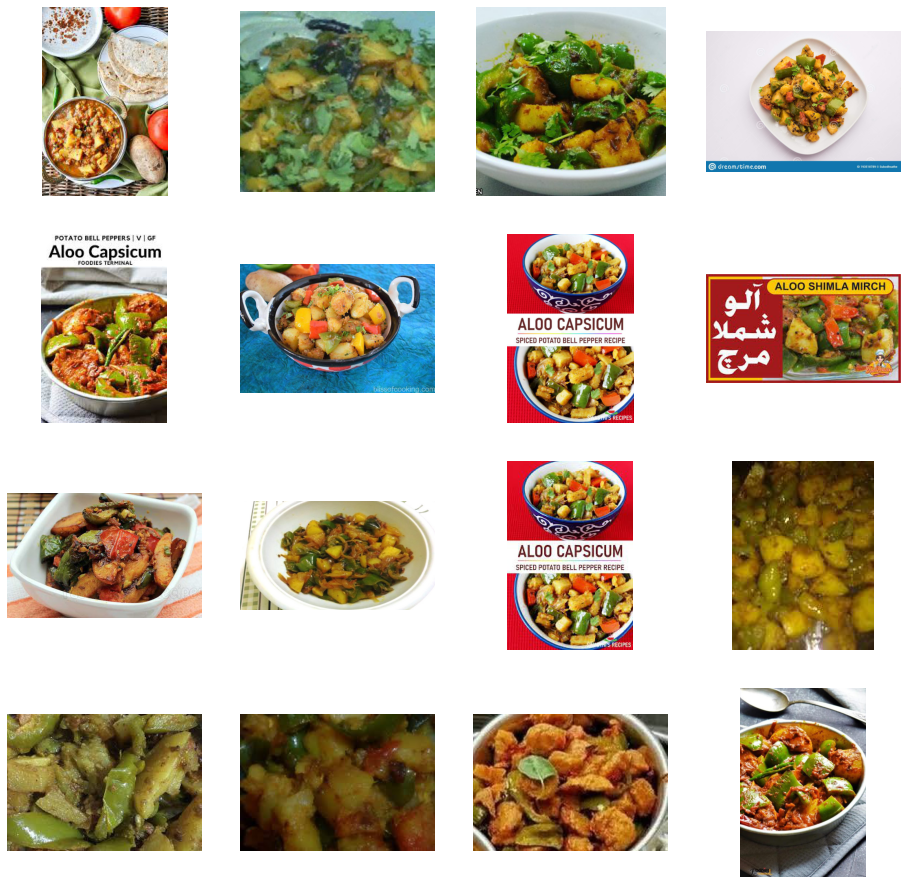

In [14]:
# Plot Images without shuffle randomly

fig = plt.gcf()
fig.set_size_inches(16,16)

next_pix_ = images_path

for i, img_path in enumerate(next_pix_[0:16]):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

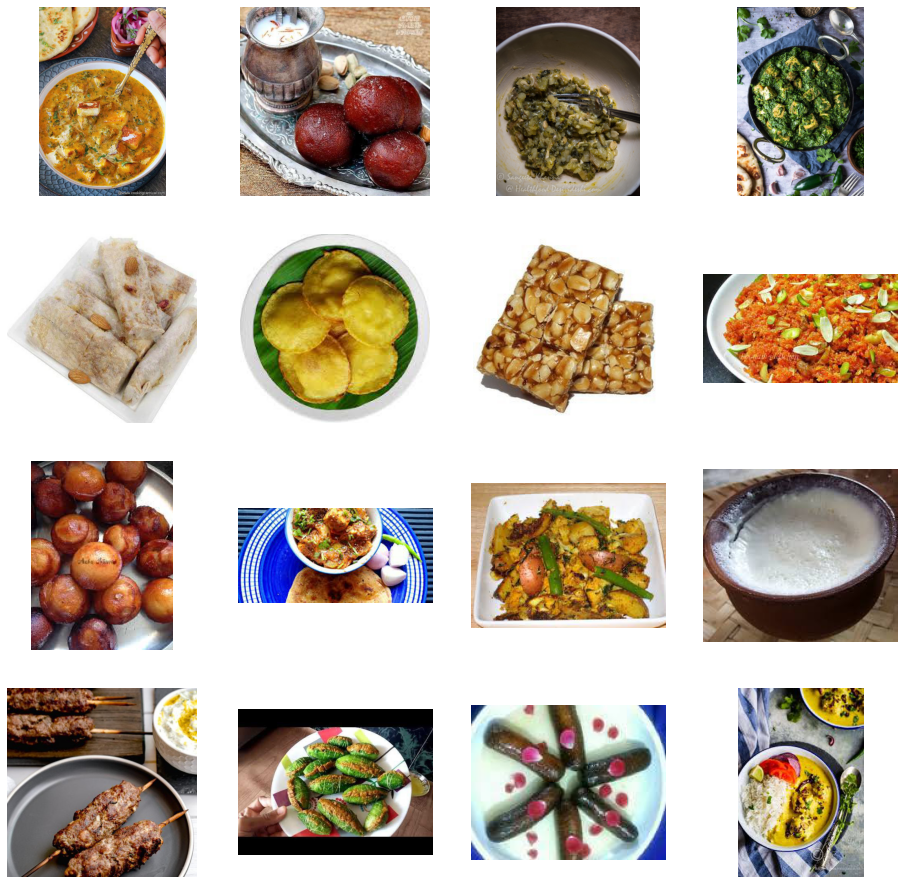

In [15]:
# Now, Plot images after shuffle randomly

fig = plt.gcf()
fig.set_size_inches(16,16)

next_pix_ = images_path
random.shuffle(next_pix_)

for i, img_path in enumerate(next_pix_[0:16]):
    sp = plt.subplot(4,4,i+1)
    sp.axis('off')

    img = mpimg.imread(img_path)
    plt.imshow(img)
    
plt.show()

In [16]:
# Shuffle images_pixel with their label

shuf = list(zip(images_pixels, labels))
random.shuffle(shuf)

train_data, labels_data = zip(*shuf)

print('Images: ', len(train_data))
print('Image Labels: ', len(labels_data))

Images:  4000
Image Labels:  4000


In [17]:
# Normalize train Data

x_data = np.array(train_data) / 255
y_data = to_categorical(labels_data, num_classes = 80)

In [18]:
# Splitting

x_train, x_val, y_train, y_val = train_test_split(x_data, y_data, test_size=0.3, random_state=100)

print("X train data : ", len(x_train))
print("X label data : ", len(x_val))
print("Y test data : ", len(y_train))
print("Y label data : ", len(y_val))

X train data :  2800
X label data :  1200
Y test data :  2800
Y label data :  1200


In [19]:
# Data Generation of Image


datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=45,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.3, # Randomly zoom image 
        shear_range=0.3,
        width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=True,
        fill_mode='nearest')  # randomly flip images

datagen.fit(x_train)

In [20]:
# Use a pretrained Model

pretrained_model = tf.keras.applications.DenseNet201(input_shape=(100,100,3),
                                                      include_top=False,
                                                      weights='imagenet',
                                                      pooling='avg')

pretrained_model.trainable = False

74836368/74836368 [==============================] - 0s 0us/step


In [21]:
# Create an Own Model

inputs = pretrained_model.input
drop_layer = tf.keras.layers.Dropout(0.25)(pretrained_model.output)
x_layer = tf.keras.layers.Dense(256, activation='relu')(drop_layer)
x_layer1 = tf.keras.layers.Dense(128, activation='relu')(x_layer)
drop_layer1 = tf.keras.layers.Dropout(0.20)(x_layer1)
outputs = tf.keras.layers.Dense(80, activation='softmax')(drop_layer1)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [22]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 106, 106, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 50, 50, 64)   9408        ['zero_padding2d[0][0]']         
                                                                                                  
 conv1/bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1/conv[0][0]']         

In [23]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)

model.compile(optimizer='rmsprop', loss='kullback_leibler_divergence', metrics=['acc'])

In [24]:
history = model.fit(datagen.flow(x_train, y_train, batch_size=50),
                   validation_data=(x_val, y_val),
                   epochs=50)

Epoch 1/50
56/56 [==============================] - 36s 286ms/step - loss: 4.4642 - acc: 0.0261 - val_loss: 4.2583 - val_acc: 0.0350
Epoch 2/50
56/56 [==============================] - 11s 186ms/step - loss: 4.1457 - acc: 0.0607 - val_loss: 3.8071 - val_acc: 0.0950
Epoch 3/50
56/56 [==============================] - 9s 155ms/step - loss: 3.8221 - acc: 0.0979 - val_loss: 3.6267 - val_acc: 0.1300
Epoch 4/50
56/56 [==============================] - 9s 155ms/step - loss: 3.5581 - acc: 0.1371 - val_loss: 3.4097 - val_acc: 0.1692
Epoch 5/50
56/56 [==============================] - 10s 174ms/step - loss: 3.3659 - acc: 0.1757 - val_loss: 3.2050 - val_acc: 0.2108
Epoch 6/50
56/56 [==============================] - 9s 156ms/step - loss: 3.2011 - acc: 0.2104 - val_loss: 3.0715 - val_acc: 0.2275
Epoch 7/50
56/56 [==============================] - 11s 194ms/step - loss: 3.0558 - acc: 0.2282 - val_loss: 3.0941 - val_acc: 0.2200
Epoch 8/50
56/56 [==============================] - 9s 156ms/step - loss

In [25]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

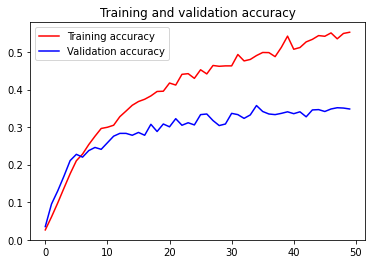

<Figure size 432x288 with 0 Axes>

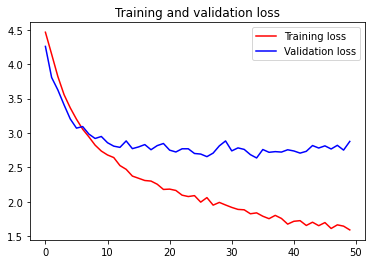

<Figure size 432x288 with 0 Axes>

In [26]:
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()


plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

In [27]:
#save model
model.save('/content/indianFood.h5')